# MULTIPLE - Hybrid Spectral Net

In [1]:
%%capture
!python -m pip install abraia
!python -m pip install wget

import os
if not os.getenv('ABRAIA_KEY'):
   #@markdown <a href="https://abraia.me/console/settings" target="_blank">Get your ABRAIA_KEY</a>
   abraia_key = ''  #@param {type: "string"}
   %env ABRAIA_KEY=$abraia_key

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abraia import Multiple, hsi

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
 
multiple = Multiple()

ModuleNotFoundError: No module named 'abraia'

## Data loading

In [ ]:
dataset = 'IP'
X, y, class_names = hsi.load_dataset(dataset)

print(f'HSI image size (width, height, bands): {X.shape}')
summary = pd.DataFrame([{'class_name': label, 'samples': np.sum(y == val)} for val, label in enumerate(class_names)])
summary.iloc[1:]

((145, 145, 200), (145, 145))

In [ ]:
patch_size = 25
K = 30 if dataset == 'IP' else 15
X_train, X_test, y_train, y_test = hsi.generate_training_data(X, y, patch_size, K, train_ratio=0.5)
X_train.shape, y_train.shape

((10512, 25, 25, 30, 1), (10512,))

## Model training and validation

Epoch 1/50
42/42 [==============================] - 42s 218ms/step - loss: 2.3439 - accuracy: 0.4150
Epoch 2/50
42/42 [==============================] - 9s 214ms/step - loss: 1.8105 - accuracy: 0.5118
Epoch 3/50
42/42 [==============================] - 9s 217ms/step - loss: 1.4868 - accuracy: 0.5416
Epoch 4/50
42/42 [==============================] - 9s 219ms/step - loss: 1.1586 - accuracy: 0.6184
Epoch 5/50
42/42 [==============================] - 9s 222ms/step - loss: 0.9183 - accuracy: 0.6940
Epoch 6/50
42/42 [==============================] - 9s 226ms/step - loss: 0.6112 - accuracy: 0.7979
Epoch 7/50
42/42 [==============================] - 10s 230ms/step - loss: 0.4786 - accuracy: 0.8465
Epoch 8/50
42/42 [==============================] - 10s 232ms/step - loss: 0.3783 - accuracy: 0.8769
Epoch 9/50
42/42 [==============================] - 10s 230ms/step - loss: 0.3102 - accuracy: 0.8949
Epoch 10/50
42/42 [==============================] - 9s 226ms/step - loss: 0.3114 - accuracy: 0.

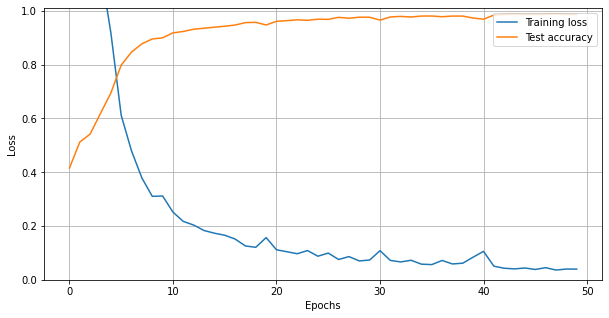

In [ ]:
model = hsi.create_model(patch_size, K, len(class_names))
history = hsi.train_model(model, X_train, y_train)
hsi.plot_train_history(history)

In [ ]:
y_pred = hsi.evaluate_model(model, X_test, y_test)

print('Overall accuracy', hsi.accuracy_score(y_test, y_pred))
print(hsi.classification_report(y_test, y_pred, target_names=class_names))
print(hsi.confusion_matrix(y_test, y_pred))

Overall accuracy 0.9730809473984591
                              precision    recall  f1-score   support

                                   0.97      0.98      0.97      5388
                     Alfalfa       1.00      0.83      0.90        23
                 Corn-notill       0.98      0.96      0.97       714
                Corn-mintill       0.98      0.97      0.97       415
                        Corn       0.92      0.92      0.92       118
               Grass-pasture       0.95      0.94      0.95       242
                 Grass-trees       0.98      0.96      0.97       365
         Grass-pasture-mowed       1.00      0.71      0.83        14
               Hay-windrowed       1.00      0.99      1.00       239
                        Oats       1.00      0.70      0.82        10
              Soybean-notill       0.96      0.98      0.97       486
             Soybean-mintill       0.98      0.99      0.98      1228
               Soybean-clean       0.97      0.96    

## Classification results

In [ ]:
output = hsi.predict_model(model, X, patch_size, K)

(-0.5, 144.5, 144.5, -0.5)

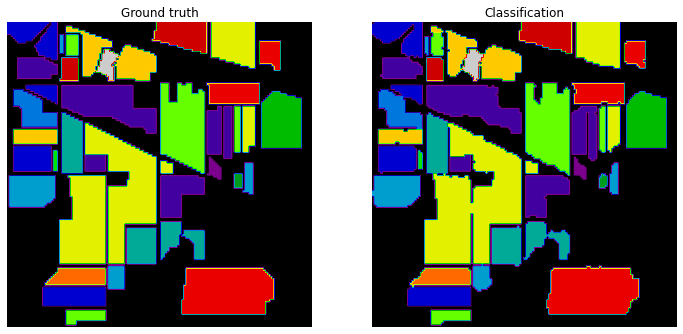

In [ ]:
plt.subplot(121)
plt.title('Ground truth')
plt.imshow(y, cmap='nipy_spectral')
plt.axis('off')
plt.subplot(122)
plt.title('Classification')
plt.imshow(output, cmap='nipy_spectral')
plt.axis('off')